<a href="https://colab.research.google.com/github/Atharva-D/Detection-and-Prediction-of-Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting the drive

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Creating R environment on colab

In [7]:
%load_ext rpy2.ipython



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#Loading the necessary Libraries.

In [24]:
%%R
install.packages('caret')
library(tidyverse)
library(caret)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘future’, ‘future.apply’, ‘numDeriv’, ‘lava’, ‘prodlim’, ‘ipred’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/future_1.22.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 347935 bytes (339 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

#Reading the diabetes dataset

In [19]:
%%R
db<-read.csv("/content/gdrive/My Drive/DS_CP/diabetes.csv")
db

    Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1             6     148            72            35       0 33.6
2             1      85            66            29       0 26.6
3             8     183            64             0       0 23.3
4             1      89            66            23      94 28.1
5             0     137            40            35     168 43.1
6             5     116            74             0       0 25.6
7             3      78            50            32      88 31.0
8            10     115             0             0       0 35.3
9             2     197            70            45     543 30.5
10            8     125            96             0       0  0.0
11            4     110            92             0       0 37.6
12           10     168            74             0       0 38.0
13           10     139            80             0       0 27.1
14            1     189            60            23     846 30.1
15            5     166  

In [21]:
%%R
head(db)

  Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1           6     148            72            35       0 33.6
2           1      85            66            29       0 26.6
3           8     183            64             0       0 23.3
4           1      89            66            23      94 28.1
5           0     137            40            35     168 43.1
6           5     116            74             0       0 25.6
  DiabetesPedigreeFunction Age Outcome
1                    0.627  50       1
2                    0.351  31       0
3                    0.672  32       1
4                    0.167  21       0
5                    2.288  33       1
6                    0.201  30       0


#Types of columns available in our dataset

In [13]:
%%R
colnames(db)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


#Dimension of diabetes dataset

In [14]:
%%R
nrow(db)
ncol(db)
dim(db)

[1] 768   9


##How many patients have Diabetes?

In [15]:
%%R

positive=sum(db$Outcome==1)
print(positive)

[1] 268


##How many patients do not have Diabetes?

In [16]:
%%R

negative=sum(db$Outcome==0)
print(negative)

[1] 500


##Average age of patients having Diabetes.

In [17]:
%%R

positive_age=c(db$Age[db$Outcome==1])
print(positive_age)
Avg_age=mean(positive_age)
cat("\nThe average age of people having diabetes is: ",Avg_age,"\n")

  [1] 50 32 33 26 53 54 34 59 51 32 31 31 32 41 29 51 41 43 28 46 27 56 54 25 31
 [26] 58 41 39 42 38 28 42 26 37 43 60 31 33 24 24 46 39 61 38 25 23 26 40 62 33
 [51] 33 30 42 42 43 36 47 32 41 36 29 36 26 37 41 60 33 31 25 36 40 29 23 26 29
 [76] 57 52 41 24 36 38 25 32 41 21 66 24 22 46 26 51 23 32 22 33 49 44 21 51 27
[101] 35 25 28 38 29 28 47 52 29 25 31 24 29 46 30 25 28 47 25 30 27 43 29 59 25
[126] 36 43 30 23 41 44 33 41 37 49 28 44 29 29 67 29 45 25 58 32 35 45 58 27 31
[151] 22 25 31 35 41 46 39 28 21 22 37 28 36 31 38 43 29 41 33 30 25 22 23 38 51
[176] 38 29 35 31 24 45 55 41 35 46 28 53 45 23 32 43 27 56 37 53 54 28 33 21 62
[201] 21 52 41 52 45 44 22 38 54 36 22 36 40 50 50 24 34 38 32 50 33 22 42 25 27
[226] 22 43 40 40 70 40 31 53 25 26 27 46 44 43 43 31 49 52 30 45 23 38 34 31 52
[251] 42 34 22 24 42 48 45 27 36 50 22 26 45 37 52 66 43 47

The average age of people having diabetes is:  37.06716 


#Summary of Dataset


In [27]:
%%R

db$Outcome<-as.factor(db$Outcome) # Identifying a target variable and setting it as a factor.
summary(db)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:5

#Normalization of Data
#*i.e., Preprocessing of data*

In [28]:
%%R
library(caret)
preProcess_range_modeltr = preProcess(db, method = 'range')
trainData = predict(preProcess_range_modeltr, newdata = db)
levels(trainData$Outcome) = c("Class0" , "Class1") #Convert binary outcome into character for caret package

In [29]:
%%R
head(trainData)

  Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI
1  0.35294118 0.7437186     0.5901639     0.3535354 0.0000000 0.5007452
2  0.05882353 0.4271357     0.5409836     0.2929293 0.0000000 0.3964232
3  0.47058824 0.9195980     0.5245902     0.0000000 0.0000000 0.3472429
4  0.05882353 0.4472362     0.5409836     0.2323232 0.1111111 0.4187779
5  0.00000000 0.6884422     0.3278689     0.3535354 0.1985816 0.6423249
6  0.29411765 0.5829146     0.6065574     0.0000000 0.0000000 0.3815201
  DiabetesPedigreeFunction       Age Outcome
1               0.23441503 0.4833333  Class1
2               0.11656704 0.1666667  Class0
3               0.25362938 0.1833333  Class1
4               0.03800171 0.0000000  Class0
5               0.94363792 0.2000000  Class1
6               0.05251921 0.1500000  Class0


In [30]:
%%R
summary(trainData)

  Pregnancies         Glucose       BloodPressure    SkinThickness   
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.05882   1st Qu.:0.4975   1st Qu.:0.5082   1st Qu.:0.0000  
 Median :0.17647   Median :0.5879   Median :0.5902   Median :0.2323  
 Mean   :0.22618   Mean   :0.6075   Mean   :0.5664   Mean   :0.2074  
 3rd Qu.:0.35294   3rd Qu.:0.7048   3rd Qu.:0.6557   3rd Qu.:0.3232  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    Insulin             BMI         DiabetesPedigreeFunction      Age        
 Min.   :0.00000   Min.   :0.0000   Min.   :0.00000          Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.4069   1st Qu.:0.07077          1st Qu.:0.0500  
 Median :0.03605   Median :0.4769   Median :0.12575          Median :0.1333  
 Mean   :0.09433   Mean   :0.4768   Mean   :0.16818          Mean   :0.2040  
 3rd Qu.:0.15041   3rd Qu.:0.5455   3rd Qu.:0.23409          3rd Qu.:0.3333  
 Max.   :1.00000   Max.   :1.0000   Max.  

In [36]:
%%R
#Fit Control
fitControl = trainControl(
    method = 'cv' , 
    number = 5 ,
    savePredictions = 'final' ,
    classProbs = T,
    summaryFunction = twoClassSummary
)

In [37]:
%%R
install.packages('kernlab')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/kernlab_0.9-29.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1168376 bytes (1.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [44]:
%%R
model1 = train(Outcome ~ . , data=trainData, method = 'knn' , tuneLength = 5, trControl = fitControl) #KNN MODEL
model2 = train(Outcome ~ . , data=trainData, method = 'svmRadial' , tuneLength = 5, trControl = fitControl) #SVM MODEL
model3 = train(Outcome ~ . , data=trainData, method = 'rpart' , tuneLength = 5, trControl = fitControl) #RandomForest MODEL

In [45]:
%%R
modelsCompare <- resamples(list(KNN=model1,SVM=model2,RandomForest=model3))

summary(modelsCompare)


Call:
summary.resamples(object = modelsCompare)

Models: KNN, SVM, RandomForest 
Number of resamples: 5 

ROC 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
KNN          0.7235185 0.7885185 0.7970755 0.7912519 0.8062037 0.8409434    0
SVM          0.7941509 0.7996296 0.8300000 0.8249196 0.8366667 0.8641509    0
RandomForest 0.7484906 0.7531481 0.7815741 0.7795632 0.7860185 0.8285849    0

Sens 
             Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
KNN          0.83    0.84   0.86 0.860    0.88 0.89    0
SVM          0.79    0.85   0.86 0.862    0.89 0.92    0
RandomForest 0.74    0.83   0.84 0.828    0.85 0.88    0

Spec 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
KNN          0.4259259 0.4629630 0.5094340 0.5114605 0.5740741 0.5849057    0
SVM          0.5094340 0.5370370 0.6111111 0.5782669 0.6111111 0.6226415    0
RandomForest 0.4814815 0.5471698 0.5555556 0.5858141 0.6226415 0.7222222    0



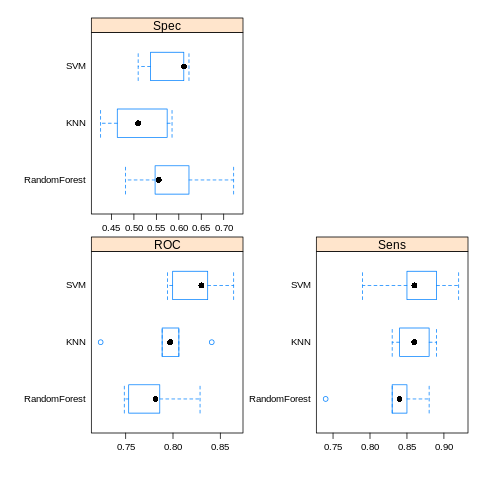

In [46]:
%%R
scales <- list(x=list(relation = 'free'), y = list(relation = 'free'))
bwplot(modelsCompare, scales=scales)

In [ ]:
%%R

In [ ]:
%%R

In [ ]:
%%R

In [ ]:
%%R

In [ ]:
%%R

In [ ]:
%%R

In [ ]:
%%R